- Genetic Algorithm
  
1. Initialize the data 
2. Score / Fitness 
3. Iterate: 
4. - Selection 
5. - crossover 
6. - mutation 

In [1]:
import numpy as np 
import random 
import matplotlib.pyplot as plt 

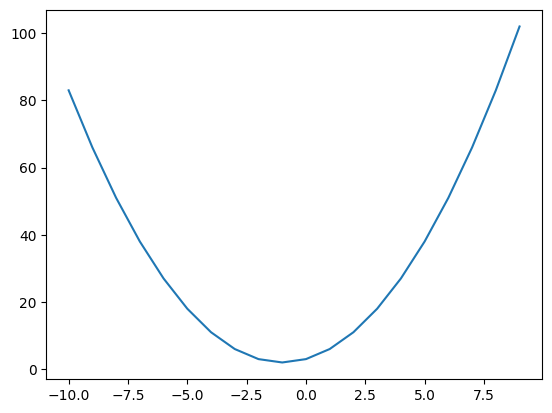

In [2]:
# Objective: y = A x**2 + B*x + C 

Ground_Truth_A = 1 
Ground_Truth_B = 2
Ground_Truth_C = 3 

x = np.linspace(-10, 9, 20)
y = Ground_Truth_A * x ** 2 + Ground_Truth_B * x + Ground_Truth_C

plt.plot(x,y)

In [3]:
def initilize(size):
    return [ ( np.random.uniform(-10, 10), np.random.uniform(-10, 10), np.random.uniform(-10, 10) ) for _ in range(size)]

In [4]:
def fitness(individual):
    a, b, c = individual

    x =  np.linspace(-10, 9, 20)

    y_ground_truth = Ground_Truth_A * x ** 2 + Ground_Truth_B * x + Ground_Truth_C

    y_pred = a * x ** 2 + b * x + c

    return -np.mean( (y_ground_truth -y_pred)** 2)

In [5]:
def selection(data):
    sample_index = np.random.choice(len(data), 5, replace = False)
    data = np.array(data)[sample_index]
    return max(data, key = fitness)

In [6]:
def crossover(parent1, parent2):
    a1, b1, c1 = parent1 
    a2, b2, c2 = parent2 

    return ( (a1+a2)/2 , (b1+b2)/2, (c1+c2)/2 )

In [7]:
def mutation(indivisual):

    a, b ,c = indivisual

    if np.random.rand() < 0.1: 
        a = a + np.random.uniform(-2, 2)
    
    if np.random.rand() < 0.1: 
        b = b + np.random.uniform(-2, 2)

    if np.random.rand() < 0.1:
        c = c + np.random.uniform(-2, 2)

    return (a, b, c)


In [8]:
def genetic_algorithm(size = 20, iteration = 4000): 

    population = initilize(size)
    
    for i in range(iteration):
        population = sorted(population, key = fitness, reverse = True)
        new_population = population[:5]

        while len(new_population) < size:
            parent_A = selection(population)
            parent_B = selection(population)
            children = crossover(parent_A, parent_B)
            children = mutation(children)
            new_population.append(children)

        population = new_population 

        answer = new_population[0]

        if (i+1) % 50 == 0:
            print(f'A is {answer[0]}, B is {answer[1]}, C is {answer[2]}, score is: {fitness(answer)}')

In [9]:
genetic_algorithm()

A is 1.0107357722195105, B is 2.0123255298388436, C is 2.5886777281487823, score is: -0.10460153735672265
A is 1.0107357722195105, B is 2.0123255298388436, C is 2.6316908817423803, score is: -0.10147619382088904
A is 1.0107357722195105, B is 2.0123255298388436, C is 2.6316908817423803, score is: -0.10147619382088904
A is 1.0107357722195105, B is 2.0123255298388436, C is 2.6316908817423803, score is: -0.10147619382088904
A is 1.0107357722195105, B is 2.0123255298388436, C is 2.6316908817423803, score is: -0.10147619382088904
A is 1.010246572474271, B is 2.0123255298388436, C is 2.646545527064411, score is: -0.0925734568591697
A is 1.006125655825203, B is 2.0061663682145814, C is 2.8012159732894357, score is: -0.0329494939329804
A is 1.006125655825203, B is 2.0061663682145814, C is 2.8012159732894357, score is: -0.0329494939329804
A is 1.006125655825203, B is 2.0061663682145814, C is 2.8012159732894357, score is: -0.0329494939329804
A is 1.006125655825203, B is 2.0061663682145814, C is 2